In [34]:
import matplotlib.pyplot as plt
import numpy as np


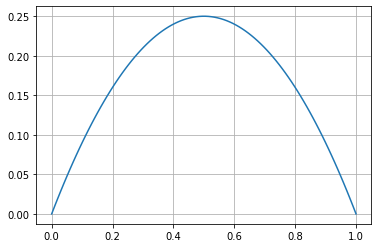

In [28]:
def f(x, lam=1):
    return lam*x*(1-x)

x = np.linspace(0,1,100)
plt.plot(x, f(x))
plt.grid()

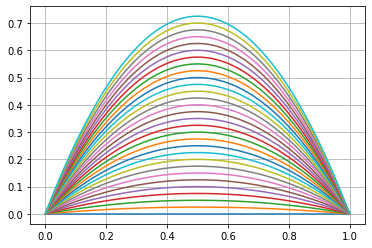

In [5]:
x = np.linspace(0,1,100)
for lam in np.arange(0,3,0.1):
    plt.plot(x, f(x, lam=lam))
    
plt.grid()

In [8]:
def mapRepeat(x, n=1, lam=1):
    for i in range(n):
        x = f(x, lam)
    return x

    

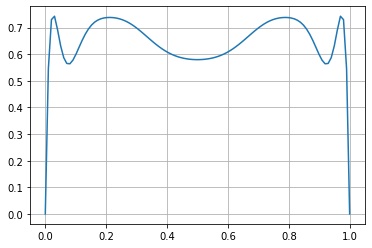

In [22]:
plt.plot(x, mapRepeat(x, 4, 3))
plt.grid()

In [29]:
def getRepeatResults(x, n=1, lam=1):
    results = [x]
    for i in range(n):
        x = f(x, lam)
        results.append(x)
    return results



        

In [30]:
r

[0.9,
 0.08999999999999998,
 0.08189999999999999,
 0.07519238999999998,
 0.06953849448608788]

<IPython.core.display.Javascript object>


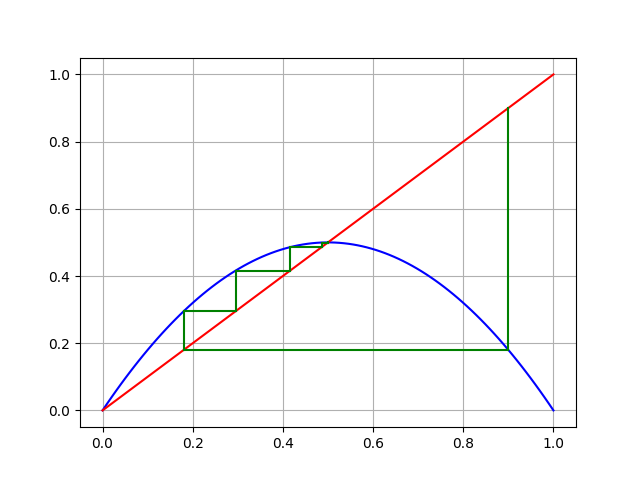

[0.9,
 0.17999999999999997,
 0.29519999999999996,
 0.41611392,
 0.4859262511644672,
 0.49960385918742867,
 0.49999968614491325,
 0.49999999999980305,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5]

In [53]:
def plotMap(lam=1):
    x = np.linspace(0,1,100)
    plt.plot(x, f(x, lam), 'b-')
    plt.plot(x, x, 'r-')
    plt.grid()
    
def plotResults(x=0.25, lam=1, n=1):
    r = getRepeatResults(x, n, lam)
    plotMap(lam)
    for x in r:
        y = f(x,lam)
        plt.plot([x,x],[x,y],'g-')
        plt.plot([x,y],[y,y],'g-')
    return r

plotResults(x=0.9, lam=2, n=100)
    
    